In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Safari'


link = 'https://rally-base.com/2023/safari-rally-kenya-2023/?ssId='
startat, no_ss=7656, int(19) # starting number of url, count of Special Stages

canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(ss, val, ss_a, "\n", my_url11)
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[1]
   
    data.columns = data.iloc[0]
    data = data[1:]
    data['ss']=ss+1
    #print(data.columns)
    
    equal = '-' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('-', method='ffill')
    
    #data.to_csv('05_rally23_SS'+str(ss+1)+'.csv', index=False)

    rally_23.append(data)

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)
#rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(str).astype(int)
rally2023_stages['No.'] = rally2023_stages['No.'].astype(str).astype(int)
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:10]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No.,Crew,Group,SS time,Aver. speed sec/km,Diff.Leader Diff.Prev.,ss,Race,cou
1,1,8,Tänak Ott,RC1,00:03:14.3,89.68 0.00,00:00:00.0 00:00:00.0,1,Safari,1
2,2,17,Ogier S.,RC1,00:03:14.4,89.63 0.02,00:00:00.1 00:00:00.1,1,Safari,2
3,3,69,Rovanperä,RC1,00:03:16.7,88.58 0.50,00:00:02.4 00:00:02.3,1,Safari,3
4,4,11,Neuville,RC1,00:03:17.0,88.45 0.56,00:00:02.7 00:00:00.3,1,Safari,4
5,5,33,Evans Elf,RC1,00:03:17.6,88.18 0.68,00:00:03.3 00:00:00.6,1,Safari,5
...,...,...,...,...,...,...,...,...,...,...
17,17,37,Kimathi M,RC3,00:08:04.8,78.18 14.22,00:02:29.8 00:00:18.7,19,Safari,17
18,18,38,Bailey Ja,RC3,00:08:36.7,73.35 17.26,00:03:01.7 00:00:31.9,19,Safari,18
19,19,30,Virani Aa,RC2,00:08:55.2,70.83 19.01,00:03:20.2 00:00:18.5,19,Safari,19
20,20,45,Rathod Mi,-,00:09:03.1,69.79 19.76,00:03:28.1 00:00:07.9,19,Safari,20


In [5]:
rally2023_stageClass=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'SS time', 'cou'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['Aver. speed sec/km', 'Diff.Leader Diff.Prev.', 'Pos.', 'cou'], axis=1)
rally2023_ClassView = rally2023_stageClass.set_index(['No.', 'Crew','Group','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['No.', 'Crew','Group', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
rally2023_ClassView2 = rally2023_stageClass2.set_index(['No.','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView2 = rally2023_ClassView2.fillna("-")


In [6]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv',index=False)

In [7]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView2, (str(rallyname) + '_Stages_Classification.jpg'))


In [8]:
rally2023_ClassView

0                           Pos.                                              \
ss                            1   2   3   4   5   6   7   8   9   10  11  12   
No. Crew       Group Race                                                      
4   Lappi  Esa RC1   Safari    6   8   1   7   2   2   3   3   4   2  22  19   
6   Sordo  Dan RC1   Safari    8   6   6   5   5   7   6   6   7   6   5   6   
7   Loubet  P. RC1   Safari    9   9   7   8  19   8  11  10   9  10   7   8   
8   Tänak  Ott RC1   Safari    1   7   8  10   3   6   5   5   8   7  11   7   
9   Serderidis RC1   Safari   11  13  13  12  12  12  10  13  11  12  16  19   
11  Neuville   RC1   Safari    4   4   9   2   6  29  25   7   6   8   6   3   
17  Ogier  S.  RC1   Safari    2   1   2   3   1   1   1   1   2   3   1   2   
18  Katsuta  T RC1   Safari    7   5   3   6   8   5   7   4   5   5   3   1   
20  Solberg  O RC2   Safari   10  10  10   9   9   9  26   9  10  15   8   9   
21  Kajetanowi RC2   Safari   12  11  11  13  11  10   9  11  12   9  10  10   
22  Munster  G RC2   Safari   13  12  12  11  10  11   8  12  13  11   9  21   
23  Prokop  Ma RC2   Safari   14  14  14  15  13  13  12  15  15  16  13  11   
24  Kremer  Ar RC2   Safari   15  15  15  14  14  14  21  16  16  14  15  13   
25  Patel  Kar RC2   Safari   24  24  23  20  17  17  24  28  25  24  14  14   
26  Tundo  Car RC2   Safari   17  16  16  16  15  16  13  14  14  13  12  12   
27  Chwist  Da RC2   Safari   15  17  18  17  16  18  23  17  26  25  23  21   
28  Díaz Aboit RC2   Safari   18  23  21  25  24  20  18  25  21  25  23  21   
29  Vassilakis RC2   Safari   23  27  28  28  27  30  26  26  24  21  18  15   
30  Virani  Aa RC2   Safari   20  20  26  21  20  25  16  20  17  17  23  21   
32  Singh Vohr RC2   Safari   25  31  27  26  29  24  20  29  27  25  23  21   
33  Evans  Elf RC1   Safari    5   3   5   4   4   4   4   8   3   4   4   4   
34  Dominguez  RC3   Safari   19  19  17  19  21  15  14  21  19  18  19  16   
35  Anwar  Ham RC3   Safari   26  18  19  18  18  19  31  30  28  28   -   -   
36  Wahome  Je RC3   Safari   29  30  30  29  28  22  29  22  20  23  27  27   
37  Kimathi  M RC3   Safari   21  25  24  30  26  23  17  24  28  28  27  27   
38  Bailey  Ja RC3   Safari   22  22  20  24  23  21  15  19  28  28  27  27   
40  Davite  G. RC2   Safari   31  26  22  23  22  28  26  18  18  19  17  21   
41  Nzioka  Ev -     Safari   28  21  25  22  25  26  19  31  31  31  30  30   
44  Sachania   -     Safari   27  28  29  27  30  27  22  27  23  22  20  17   
45  Rathod  Mi -     Safari   30  29  31  31  31  31  30  23  22  20  21  18   
69  Rovanperä  RC1   Safari    3   2   4   1   7   3   2   2   1   1   2   5   

0                                                        
ss                           13  14  15  16  17  18  19  
No. Crew       Group Race                                
4   Lappi  Esa RC1   Safari  18  13  25  18  14  10   4  
6   Sordo  Dan RC1   Safari   6   7   7   7   5   4   7  
7   Loubet  P. RC1   Safari   9   8   8   6   7   9   8  
8   Tänak  Ott RC1   Safari   8   4   3   1   6   7   1  
9   Serderidis RC1   Safari  18   -   -   -   -   -   -  
11  Neuville   RC1   Safari   7   6   5   2   8   5   -  
17  Ogier  S.  RC1   Safari   3   2   1   5   2   6   3  
18  Katsuta  T RC1   Safari   4   3   6   8   3   1   6  
20  Solberg  O RC2   Safari   5   9   9   9   9   8   9  
21  Kajetanowi RC2   Safari  10  16  13  10  11  11  10  
22  Munster  G RC2   Safari  20  10  10  11   -   -   -  
23  Prokop  Ma RC2   Safari  12  14  15  12  12  14  11  
24  Kremer  Ar RC2   Safari  11  15  11  13  13  13  12  
25  Patel  Kar RC2   Safari  14  19  16  16   -   -   -  
26  Tundo  Car RC2   Safari  13  12  12  15  15  15  14  
27  Chwist  Da RC2   Safari  20  11  14  14  10  12  13  
28  Díaz Aboit RC2   Safari  20   -   -   -   -   -   -  
29  Vassilakis RC2   Safari  15   -   -   -   -   -   -  
30  Virani  Aa RC2   Safari  20  17  17  19  16  21  19  
32 

In [9]:
rally2023_stages[['time_hh', 'time_mm','time_ss']] = rally2023_stages['SS time'].str.split(':', expand=True)
rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_hh']*3600 + rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'SS time', 'Aver. speed sec/km',  'Diff.Leader Diff.Prev.', 'time_hh', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,No.,Crew,Group,ss,Race,cou,time_SS_sec
1,8,Tänak Ott,RC1,1,Safari,1,194.3
2,17,Ogier S.,RC1,1,Safari,2,194.4
3,69,Rovanperä,RC1,1,Safari,3,196.7
4,11,Neuville,RC1,1,Safari,4,197.0
5,33,Evans Elf,RC1,1,Safari,5,197.6
...,...,...,...,...,...,...,...
17,37,Kimathi M,RC3,19,Safari,17,484.8
18,38,Bailey Ja,RC3,19,Safari,18,516.7
19,30,Virani Aa,RC2,19,Safari,19,535.2
20,45,Rathod Mi,-,19,Safari,20,543.1


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race   ss          
Safari 1      194.3
       2      830.3
       3      409.7
       4      892.4
       5      830.2
       6      406.5
       7      904.6
       8     1050.0
       9      505.2
       10    1077.7
       11    1043.4
       12     500.6
       13    1147.7
       14     365.1
       15     675.9
       16     329.7
       17     362.6
       18     713.6
       19     335.0

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time
0,8,Tänak Ott,RC1,1,Safari,1,194.3,194.3
1,17,Ogier S.,RC1,1,Safari,2,194.4,194.3
2,69,Rovanperä,RC1,1,Safari,3,196.7,194.3
3,11,Neuville,RC1,1,Safari,4,197.0,194.3
4,33,Evans Elf,RC1,1,Safari,5,197.6,194.3
...,...,...,...,...,...,...,...,...
536,37,Kimathi M,RC3,19,Safari,17,484.8,335.0
537,38,Bailey Ja,RC3,19,Safari,18,516.7,335.0
538,30,Virani Aa,RC2,19,Safari,19,535.2,335.0
539,45,Rathod Mi,-,19,Safari,20,543.1,335.0


In [12]:
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Tänak Ott,RC1,1,Safari,1,194.3,194.3,0.0,0.000000,01
1,17,Ogier S.,RC1,1,Safari,2,194.4,194.3,0.1,0.051467,01
2,69,Rovanperä,RC1,1,Safari,3,196.7,194.3,2.4,1.235203,01
3,11,Neuville,RC1,1,Safari,4,197.0,194.3,2.7,1.389604,01
4,33,Evans Elf,RC1,1,Safari,5,197.6,194.3,3.3,1.698405,01
...,...,...,...,...,...,...,...,...,...,...,...
536,37,Kimathi M,RC3,19,Safari,17,484.8,335.0,149.8,44.716418,19
537,38,Bailey Ja,RC3,19,Safari,18,516.7,335.0,181.7,54.238806,19
538,30,Virani Aa,RC2,19,Safari,19,535.2,335.0,200.2,59.761194,19
539,45,Rathod Mi,-,19,Safari,20,543.1,335.0,208.1,62.119403,19


In [13]:
ss_times_WRC = ss_times_F[ss_times_F['Group'].str.contains('RC1')]
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Tänak Ott,RC1,1,Safari,1,194.3,194.3,0.0,0.000000,01
1,17,Ogier S.,RC1,1,Safari,2,194.4,194.3,0.1,0.051467,01
2,69,Rovanperä,RC1,1,Safari,3,196.7,194.3,2.4,1.235203,01
3,11,Neuville,RC1,1,Safari,4,197.0,194.3,2.7,1.389604,01
4,33,Evans Elf,RC1,1,Safari,5,197.6,194.3,3.3,1.698405,01
...,...,...,...,...,...,...,...,...,...,...,...
523,4,Lappi Esa,RC1,19,Safari,4,338.9,335.0,3.9,1.164179,19
524,33,Evans Elf,RC1,19,Safari,5,341.1,335.0,6.1,1.820896,19
525,18,Katsuta T,RC1,19,Safari,6,344.4,335.0,9.4,2.805970,19
526,6,Sordo Dan,RC1,19,Safari,7,344.9,335.0,9.9,2.955224,19


In [14]:
ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Tänak Ott,RC1,1,Safari,1,194.3,194.3,0.0,0.000000,01
1,17,Ogier S.,RC1,1,Safari,2,194.4,194.3,0.1,0.051467,01
2,69,Rovanperä,RC1,1,Safari,3,196.7,194.3,2.4,1.235203,01
3,11,Neuville,RC1,1,Safari,4,197.0,194.3,2.7,1.389604,01
4,33,Evans Elf,RC1,1,Safari,5,197.6,194.3,3.3,1.698405,01
...,...,...,...,...,...,...,...,...,...,...,...
523,4,Lappi Esa,RC1,19,Safari,4,338.9,335.0,3.9,1.164179,19
524,33,Evans Elf,RC1,19,Safari,5,341.1,335.0,6.1,1.820896,19
525,18,Katsuta T,RC1,19,Safari,6,344.4,335.0,9.4,2.805970,19
526,6,Sordo Dan,RC1,19,Safari,7,344.9,335.0,9.9,2.955224,19


In [15]:
ss_times_F3 =ss_times_WRC.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race       Safari                                                              \
SS.            01    02    03     04     05     06     07     08    09     10   
Crew                                                                            
Evans  Elf    3.3   8.4   4.4   14.1   10.5    3.1   10.4   68.5   2.2   22.2   
Katsuta  T    5.1   9.6   2.3   22.8   18.8    3.7   27.8   34.6   5.0   22.9   
Lappi  Esa    4.0  17.5   0.0   30.3    8.4    1.2    3.3   26.8   2.4    3.5   
Loubet  P.    8.0  34.2   7.8   38.0  165.8    9.6  172.2  113.3  27.9  103.6   
Neuville      2.7   8.7  12.5    8.0   14.1  600.0  600.0   67.1   6.8   62.2   
Ogier  S.     0.1   0.0   1.2    9.4    0.0    0.0    0.0    0.0   0.6    7.7   
Rovanperä     2.4   7.5   3.3    0.0   15.3    2.6    2.4    7.6   0.0    0.0   
Serderidis   11.3  87.6  58.3  147.5   78.3   49.6  153.5  181.4  49.4  176.7   
Sordo  Dan    5.9  11.7   7.0   22.0   11.4    6.3   24.8   42.7   7.3   29.5   
Tänak  Ott    0.0  15.2   9.3  132.6   10.2    5.4   21.3   34.9   7.5   43.7   

Race                                                                   
SS.            11     12     13    14     15     16    17    18    19  
Crew                                                                   
Evans  Elf   14.8    4.9   13.1  16.7   17.9    4.2  10.7  11.0   6.1  
Katsuta  T   12.1    0.0   31.9  11.4   27.7   18.7   8.0   0.0   9.4  
Lappi  Esa  600.0  600.0  600.0  70.1  388.3  111.1  72.1  50.0   3.9  
Loubet  P.   54.1   22.3  116.4  28.4   47.3    9.8  14.9  48.0  22.1  
Neuville     33.3    3.3   64.1  17.7   23.5    0.6  19.2  12.2   NaN  
Ogier  S.     0.0    2.3   15.3   8.1    0.0    4.5   0.6  14.9   3.3  
Rovanperä     6.4    5.8    0.0   0.0    8.6    0.9   0.0  11.1   0.8  
Serderidis  257.3  600.0  600.0   NaN    NaN    NaN   NaN   NaN   NaN  
Sordo  Dan   22.6    9.4   58.3  19.4   36.1   15.8  11.4  11.9   9.9  
Tänak  Ott  145.3   21.8  108.3  14.0   16.5    0.0  14.0  22.4   0.0

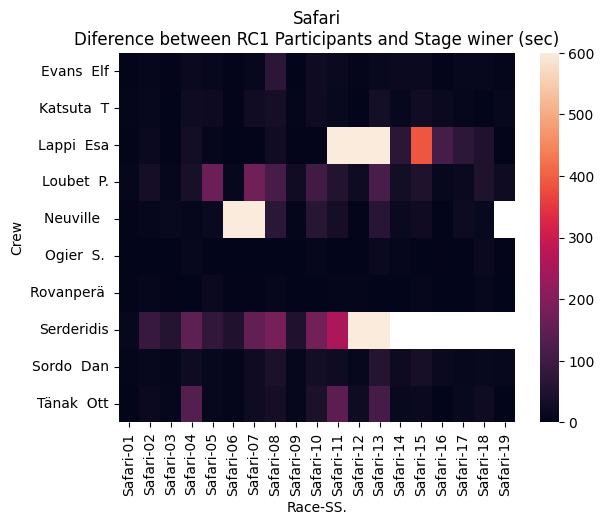

In [16]:
Heatmap_ALL = sns.heatmap(ss_times_F4)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_ALL.png")

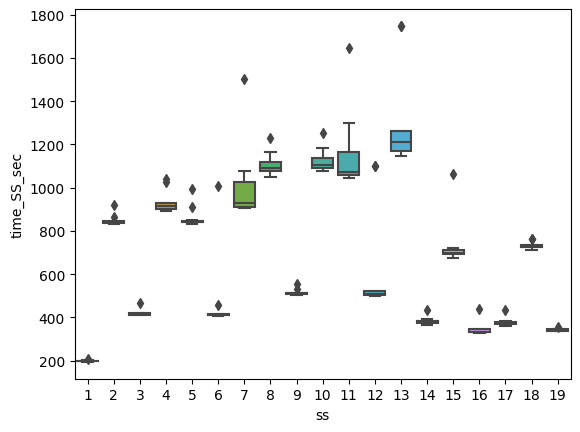

In [17]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])

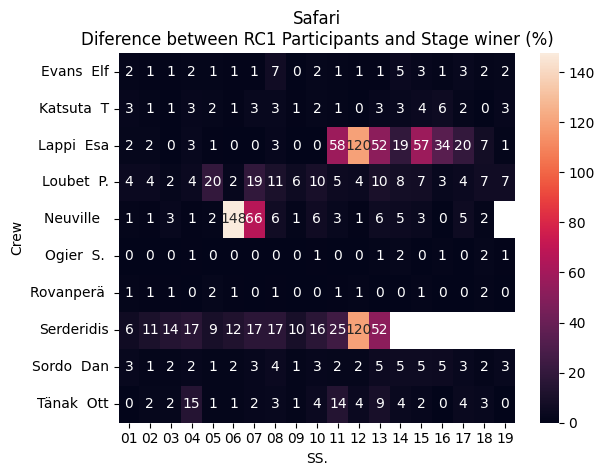

In [18]:
ss_timesa = pd.pivot_table(ss_times_WRC, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1.jpg")

In [28]:
ss_times_WRC2 = ss_times_WRC[ss_times_WRC['Crew']!= 'Serderidis']
ss_times_WRC2

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,diff,diff%,SS.
0,8,Tänak Ott,RC1,1,Safari,1,194.3,194.3,0.0,0.000000,01
1,17,Ogier S.,RC1,1,Safari,2,194.4,194.3,0.1,0.051467,01
2,69,Rovanperä,RC1,1,Safari,3,196.7,194.3,2.4,1.235203,01
3,11,Neuville,RC1,1,Safari,4,197.0,194.3,2.7,1.389604,01
4,33,Evans Elf,RC1,1,Safari,5,197.6,194.3,3.3,1.698405,01
...,...,...,...,...,...,...,...,...,...,...,...
523,4,Lappi Esa,RC1,19,Safari,4,338.9,335.0,3.9,1.164179,19
524,33,Evans Elf,RC1,19,Safari,5,341.1,335.0,6.1,1.820896,19
525,18,Katsuta T,RC1,19,Safari,6,344.4,335.0,9.4,2.805970,19
526,6,Sordo Dan,RC1,19,Safari,7,344.9,335.0,9.9,2.955224,19


In [29]:
ss_times_F6 =ss_times_WRC2.drop(['Group','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F7 = pd.pivot_table(ss_times_F6, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F7

Race       Safari                                                              \
SS.            01    02    03     04     05     06     07     08    09     10   
Crew                                                                            
Evans  Elf    3.3   8.4   4.4   14.1   10.5    3.1   10.4   68.5   2.2   22.2   
Katsuta  T    5.1   9.6   2.3   22.8   18.8    3.7   27.8   34.6   5.0   22.9   
Lappi  Esa    4.0  17.5   0.0   30.3    8.4    1.2    3.3   26.8   2.4    3.5   
Loubet  P.    8.0  34.2   7.8   38.0  165.8    9.6  172.2  113.3  27.9  103.6   
Neuville      2.7   8.7  12.5    8.0   14.1  600.0  600.0   67.1   6.8   62.2   
Ogier  S.     0.1   0.0   1.2    9.4    0.0    0.0    0.0    0.0   0.6    7.7   
Rovanperä     2.4   7.5   3.3    0.0   15.3    2.6    2.4    7.6   0.0    0.0   
Sordo  Dan    5.9  11.7   7.0   22.0   11.4    6.3   24.8   42.7   7.3   29.5   
Tänak  Ott    0.0  15.2   9.3  132.6   10.2    5.4   21.3   34.9   7.5   43.7   

Race                                                                   
SS.            11     12     13    14     15     16    17    18    19  
Crew                                                                   
Evans  Elf   14.8    4.9   13.1  16.7   17.9    4.2  10.7  11.0   6.1  
Katsuta  T   12.1    0.0   31.9  11.4   27.7   18.7   8.0   0.0   9.4  
Lappi  Esa  600.0  600.0  600.0  70.1  388.3  111.1  72.1  50.0   3.9  
Loubet  P.   54.1   22.3  116.4  28.4   47.3    9.8  14.9  48.0  22.1  
Neuville     33.3    3.3   64.1  17.7   23.5    0.6  19.2  12.2   NaN  
Ogier  S.     0.0    2.3   15.3   8.1    0.0    4.5   0.6  14.9   3.3  
Rovanperä     6.4    5.8    0.0   0.0    8.6    0.9   0.0  11.1   0.8  
Sordo  Dan   22.6    9.4   58.3  19.4   36.1   15.8  11.4  11.9   9.9  
Tänak  Ott  145.3   21.8  108.3  14.0   16.5    0.0  14.0  22.4   0.0

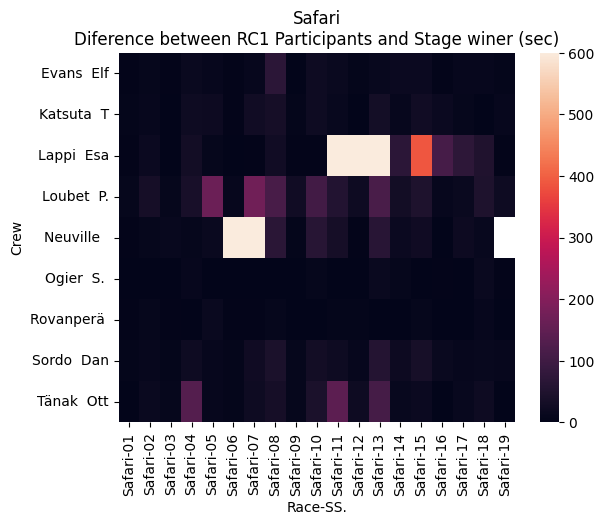

In [30]:
Heatmap_WRC2 = sns.heatmap(ss_times_F7)
plt.title(rallyname+'\nDiference between RC1 Participants and Stage winer (sec)')
plt.savefig("Heatmap_No_Serderidis.png")

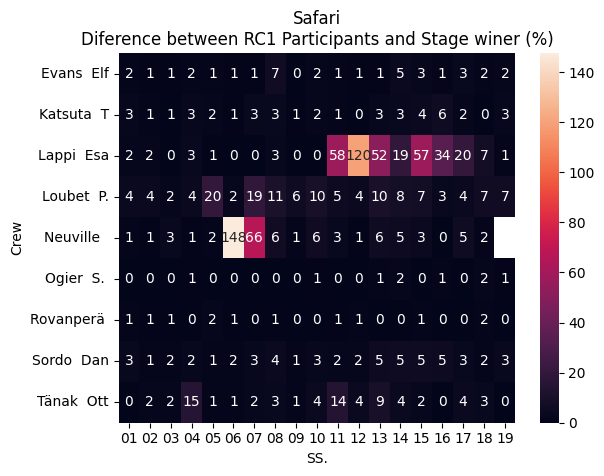

In [32]:
ss_timesb = pd.pivot_table(ss_times_WRC2, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesb, annot=True, fmt=',.0f')
plt.title(rallyname +'\nDiference between RC1 Participants and Stage winer (%)')
plt.savefig("Rc1_No_Serderidis.jpg")